<a href="https://colab.research.google.com/github/ratimayy/ML/blob/main/Week05-Logistic/Stock_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4440    0  4440    0     0  30061      0 --:--:-- --:--:-- --:--:-- 30204
100  517k  100  517k    0     0  1548k      0 --:--:-- --:--:-- --:--:-- 6653k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4440    0  4440    0     0  23404      0 --:--:-- --:--:-- --:--:-- 23492
100  392k  100  392k    0     0  1033k      0 --:--:-- --:--:-- --:--:-- 1033k


In [102]:
# Data Manipulation
import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [103]:
# Pull NIFTY data from Yahoo finance
df = yf.download('AAPL','2005-01-01', '2023-12-30')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,1.156786,1.162679,1.117857,1.130179,0.956809,691992000
2005-01-04,1.139107,1.169107,1.124464,1.141786,0.966635,1096810400
2005-01-05,1.151071,1.165179,1.143750,1.151786,0.975102,680433600
2005-01-06,1.154821,1.159107,1.130893,1.152679,0.975857,705555200
2005-01-07,1.160714,1.243393,1.156250,1.236607,1.046911,2227450400
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


In [104]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]

In [105]:
df

,Open,High,Low,Close,Adj Close,Volume,S_10,Corr,RSI,Open-Close,Open-Open
Date,,,,,,,,,,,
2005-01-28,1.296786,1.321071,1.293571,1.321071,1.118418,801612000,1.273857,0.878156,78.040397,-0.000357,0.008215
2005-01-31,1.331786,1.390893,1.330536,1.373214,1.162562,1681097600,1.285821,0.889122,83.087911,0.010715,0.035000
2005-02-01,1.375893,1.388750,1.367500,1.384464,1.172087,678395200,1.298107,0.952269,83.971135,0.002679,0.044107
2005-02-02,1.391964,1.426964,1.387321,1.421964,1.203834,1020062400,1.315518,0.970323,86.569005,0.007500,0.016071
2005-02-03,1.412500,1.418393,1.380893,1.389464,1.176320,731651200,1.328643,0.950931,74.882033,-0.009464,0.020536
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,195.747002,0.047115,50.279523,0.500000,-0.920013
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,195.734003,-0.418130,48.129982,0.009995,-1.569992
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,195.578001,-0.767443,48.574091,-0.559998,-1.119995


In [106]:
X

,Open,High,Low,Close,Adj Close,Volume,S_10,Corr,RSI
Date,,,,,,,,,
2005-01-28,1.296786,1.321071,1.293571,1.321071,1.118418,801612000,1.273857,0.878156,78.040397
2005-01-31,1.331786,1.390893,1.330536,1.373214,1.162562,1681097600,1.285821,0.889122,83.087911
2005-02-01,1.375893,1.388750,1.367500,1.384464,1.172087,678395200,1.298107,0.952269,83.971135
2005-02-02,1.391964,1.426964,1.387321,1.421964,1.203834,1020062400,1.315518,0.970323,86.569005
2005-02-03,1.412500,1.418393,1.380893,1.389464,1.176320,731651200,1.328643,0.950931,74.882033
...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,195.747002,0.047115,50.279523
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,195.734003,-0.418130,48.129982
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,195.578001,-0.767443,48.574091


In [107]:
# y = tomorrow’s closing price is higher than today’s closing price, then we will buy the stock (1), else we will sell it (-1).
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
print(y[:20])
print(y)

[ 1  1  1 -1  1  1  1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1  1]
[ 1  1  1 ...  1 -1 -1]


In [108]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


In [109]:
model = LogisticRegression()
model = model.fit (X_train,y_train)

model


LogisticRegression()

In [110]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[5.68122501248063e-18]
1,High,[5.686127781664688e-18]
2,Low,[5.620138101360255e-18]
3,Close,[5.5831060987232176e-18]
4,Adj Close,[5.0065357572999896e-18]
5,Volume,[9.713162277356151e-11]
6,S_10,[5.471752301907061e-18]
7,Corr,[3.1490350717776187e-19]
8,RSI,[3.646275382070107e-17]


In [111]:
# Specify the date for prediction
#prediction_date = '2023-12-22'
probability = model.predict_proba(X_test)
print(probability)


[[0.49653675 0.50346325]
 [0.49587905 0.50412095]
 [0.49479691 0.50520309]
 ...
 [0.49883229 0.50116771]
 [0.49917317 0.50082683]
 [0.49896485 0.50103515]]


If you print the ‘predicted’ variable, you will observe that the classifier is predicting 1, when the probability in the second column of variable ‘probability’ is greater than 0.5. When the probability in the second column is less than 0.5, then the classifier will be predicting -1.


the signal shows 1, which is a buy signal

In [112]:
predicted = model.predict(X_test)
print(predicted)

[1 1 1 ... 1 1 1]


In [113]:
predicted_labels = model.predict(X_test)
test_dates = df.index[split:]

print(predicted_labels)
print(test_dates)

[1 1 1 ... 1 1 1]
DatetimeIndex(['2018-04-27', '2018-04-30', '2018-05-01', '2018-05-02',
               '2018-05-03', '2018-05-04', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1429, freq=None)


In [114]:
# Find the dates with predicted buy signals (Signal = 1)
buy_signal_dates = test_dates[predicted_labels == 1]

# Print the date(s) with buy signal(s)
print("\nDate(s) with Buy Signal(s):")
print(buy_signal_dates)


Date(s) with Buy Signal(s):
DatetimeIndex(['2018-04-27', '2018-04-30', '2018-05-01', '2018-05-02',
               '2018-05-03', '2018-05-04', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1429, freq=None)


In [118]:
print(metrics.confusion_matrix(y_test, predicted))


[[  0 665]
 [  0 764]]


In [119]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       665
           1       0.53      1.00      0.70       764

    accuracy                           0.53      1429
   macro avg       0.27      0.50      0.35      1429
weighted avg       0.29      0.53      0.37      1429



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-120-cfc1e162592c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-120-cfc1e162592c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AAPL_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-120-cfc1e162592c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

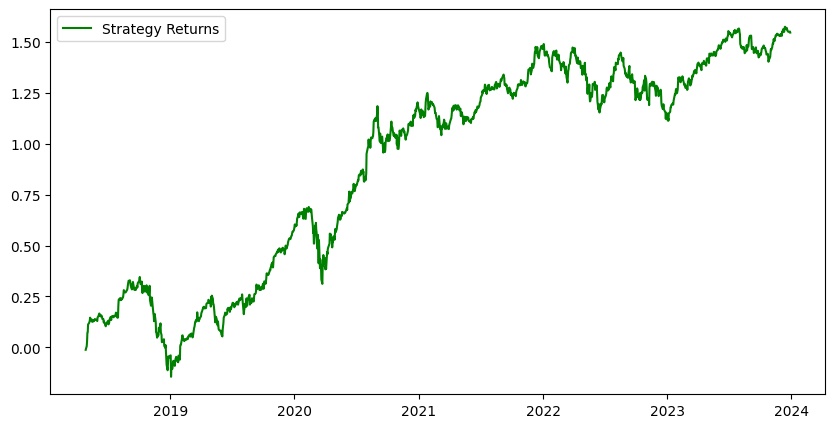

In [120]:
df['Predicted_Signal'] = model.predict(X)
df['AAPL_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_AAPL_returns = np.cumsum(df[split:]['AAPL_returns'])


df['Strategy_returns'] = df['AAPL_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

https://www.ultimatepython.co/post/python-yahoo-finance

In [115]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance

In [116]:
import yfinance as yf

In [117]:
mbk = yf.Ticker('mbk.bk')
interval = '1h'
start = '2023-9-1'
end = '2023-9-7'
mbk_price_df = mbk.history(interval=interval,start=start,end=end)
mbk_price_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-09-01 10:00:00+07:00,18.700001,19.400000,18.700001,19.200001,3954063,0.0,0.0
2023-09-01 11:00:00+07:00,19.200001,19.400000,18.900000,19.000000,1456484,0.0,0.0
2023-09-01 12:00:00+07:00,19.000000,19.000000,18.900000,19.000000,71453,0.0,0.0
2023-09-01 14:00:00+07:00,18.900000,19.000000,18.900000,19.000000,431482,0.0,0.0
2023-09-01 15:00:00+07:00,19.000000,19.000000,18.799999,18.900000,690448,0.0,0.0
2023-09-01 16:00:00+07:00,18.900000,19.000000,18.799999,18.900000,554801,0.0,0.0
2023-09-04 10:00:00+07:00,19.100000,19.600000,19.100000,19.500000,0,0.0,0.0
2023-09-04 11:00:00+07:00,19.500000,19.600000,19.100000,19.299999,1878559,0.0,0.0
2023-09-04 12:00:00+07:00,19.299999,19.299999,19.100000,19.100000,163600,0.0,0.0
